### <b>Image Denoising using Autoencoders</b>
##### <b>Importing Libraries</b>

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model
from keras import layers
from keras.datasets import mnist
from keras.utils.vis_utils import plot_model

##### <b>Functions definitions</b>

In [3]:
def preprocessing(array):
    array = array.astype("float32")/255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

def noise_generator(array):
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = array.shape)
    return np.clip(noisy_array, 0.0, 1.0)

def display(array1, array2):
    chunks = 10
    indices = np.random.randint(len(array1), size = chunks)
    image1 = array1[indices, :]
    image2 = array2[indices, :]

    plt.figure(figsize = (20, 4))
    for i, (image1, image2) in enumerate(zip(image1, image2)):
        ax = plt.subplot(2, chunks, i+1)
        plt.imshow(image1.reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, chunks, i+1+chunks)
        plt.imshow(image2.reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


##### <b>Data Preprocessing</b>

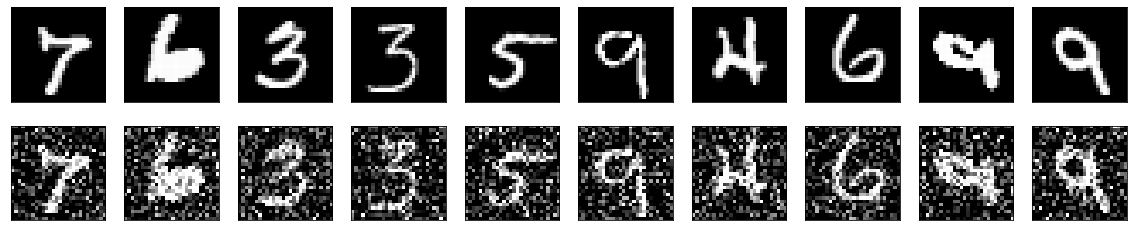

In [4]:
(train_data, _), (test_data, _) = mnist.load_data()
train_data = preprocessing(train_data)
test_data = preprocessing(test_data)
noisy_train_data = noise_generator(train_data)
noisy_test_data = noise_generator(test_data)
display(train_data, noisy_train_data)

##### <b>Creating Autoencoder Model and Training the Model</b>

In [7]:
input = layers.Input(shape=(28,28,1))

x = layers.Conv2D(50, (3,3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2,2), padding="same")(x)
x = layers.Conv2D(50, (3,3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2,2), padding="same")(x)

x = layers.Conv2DTranspose(50, (3,3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(50, (3,3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3,3), activation="sigmoid", padding="same")(x)

autoencoder = Model(input, x)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()
plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
autoencoder.fit(x = noisy_train_data, y = train_data, epochs=100, batch_size=128, shuffle=True, validation_data=(noisy_test_data, test_data))

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 50)        500       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 50)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 50)        22550     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                             
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 14, 14, 50)       2255

##### <b>Results</b>

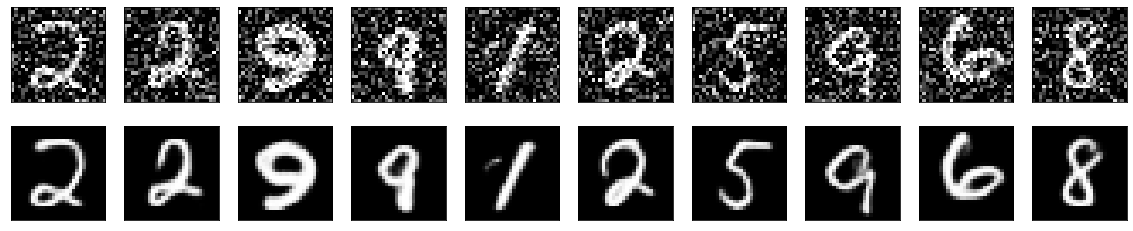

In [9]:
prediction = autoencoder.predict(noisy_test_data)
display(noisy_test_data, prediction)